# BANKING DATA ANALYSIS 

# Project Description
In the ever-evolving world of banking and finance, understanding customer behavior and the regional impact of transactions plays a crucial role in decision-making and strategic planning. This project, titled "Analyzing Banking Trends: Customer Transactions and Regional Impact," aims to explore and analyze the vast troves of transaction data to gain valuable insights into customer behavior patterns and their implications on different world regions.

Objective: The primary objective of this project is to delve into customer transactions and identify trends that may impact regional economies and financial systems. By combining data cleaning techniques in Python and utilizing SQL queries on a set of interconnected tables, we aim to gain a comprehensive understanding of how customer transactions vary across different regions and the possible implications on the banking sector.

Data Sources: The project leverages three key tables that provide valuable information for analysis:

1. world_regions table: This table contains data on various world regions and their corresponding codes and names. It serves as a reference to categorize customers based on their regional affiliation.

2. user_nodes table: The user_nodes table holds crucial details about consumers' banking nodes, including their unique consumer IDs, associated region IDs, node IDs, start dates, and end dates. This data enables us to identify the specific banking nodes to which customers are connected and their duration of association.

3. user_transaction table: This table is a comprehensive repository of customer transactions, containing data such as consumer IDs, transaction dates, types of transactions, and transaction amounts. Analyzing this data allows us to uncover patterns in customer spending and financial behaviors
 
All of this dataset was sourced by hicounselor(https://hicounselor.com/projects/analyzing-banking-trends-customer-transactions-and-regional-impact) as part of their materials for individuals to learn and build their portfolio

In [1]:
import psycopg2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


In [2]:
db_params = {
    "host": "localhost",  # or "127.0.0.1" if your database is on the local machine
    "port": 5432,         # Default PostgreSQL port
    "database": "banking_data",
    "user": "postgres",
    "password": "dibie04062000"
}


In [3]:
conn = psycopg2.connect(**db_params)


In [4]:
query = "SELECT * FROM user_nodes_cleaned;"  # Replace "your_table" with the actual table name
user_nodes = pd.read_sql_query(query, conn)


In [5]:
user_nodes

,consumer_id,region_id,node_id,start_date,end_date
0,1,3,4,2020-01-02,2020-01-03
1,2,3,5,2020-01-03,2020-01-17
2,3,5,4,2020-01-27,2020-02-18
3,4,5,4,2020-01-07,2020-01-19
4,5,3,3,2020-01-15,2020-01-23
...,...,...,...,...,...
3495,496,3,4,2020-02-25,2021-12-31
3496,497,5,4,2020-05-27,2021-12-31
3497,498,1,2,2020-04-05,2021-12-31
3498,499,5,1,2020-02-03,2021-12-31


In [6]:
user_nodes.isnull().sum()

consumer_id    0
region_id      0
node_id        0
start_date     0
end_date       0
dtype: int64

In [7]:
query = "SELECT * FROM user_transaction_cleaned;"  # Replace "your_table" with the actual table name
user_transaction = pd.read_sql_query(query, conn)


In [8]:
user_transaction

,consumer_id,transaction_date,transaction_type,transaction_amount
0,312,2020-01-20,deposit,485.0
1,376,2020-01-03,deposit,706.0
2,188,2020-01-13,deposit,601.0
3,138,2020-01-11,deposit,520.0
4,373,2020-01-18,deposit,596.0
...,...,...,...,...
5863,155,2020-01-10,deposit,712.0
5864,398,2020-01-01,deposit,196.0
5865,255,2020-01-14,deposit,563.0
5866,185,2020-01-29,deposit,626.0


In [9]:
user_transaction.isnull().sum()

consumer_id           0
transaction_date      0
transaction_type      0
transaction_amount    0
dtype: int64

In [10]:
query = "SELECT * FROM world_regions;"  # Replace "your_table" with the actual table name
world_regions = pd.read_sql_query(query, conn)

In [11]:
world_regions

,region_code,region_name
0,1,United States
1,2,Europe
2,3,Australia
3,4,Asia
4,5,Africa
5,6,Russia
6,7,China


In [12]:
world_regions.isnull().sum()

region_code    0
region_name    0
dtype: int64

# Exploratory Analysis

Task 1:List all regions along with the number of users assigned to each region.


In [13]:
query ="""SELECT
    wr.region_name AS Region,
    COUNT(DISTINCT un.consumer_id) AS NumberOfUsers
FROM
    world_regions wr
LEFT JOIN
    user_nodes_cleaned un
ON
    wr.region_code = un.region_id
GROUP BY
    wr.region_name
ORDER BY
    NumberOfUsers DESC;

"""

In [14]:
regions=  pd.read_sql_query(query, conn)

In [15]:
regions 

,region,numberofusers
0,United States,110
1,Europe,105
2,Australia,102
3,Asia,95
4,Africa,88
5,China,0
6,Russia,0


In [16]:
#conn.close()

Text(0.5, 1.0, 'Number of Users by Region')

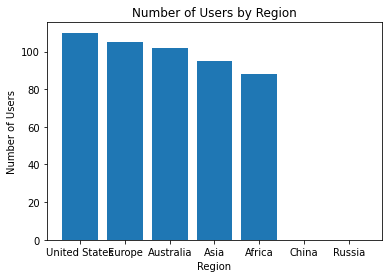

In [17]:
plt.bar(x=regions['region'], height=regions['numberofusers'])
plt.xlabel('Region')
plt.ylabel('Number of Users')
plt.title('Number of Users by Region')


Task 2:
Find the user who made the largest deposit amount and the transaction type for that deposit.

In [18]:
query = """SELECT consumer_id,transaction_type,transaction_amount FROM user_transaction_cleaned WHERE transaction_amount = (select MAX(transaction_amount) from user_transaction_cleaned);
"""

In [19]:
largest_amount= pd.read_sql_query(query, conn)

In [20]:
largest_amount

,consumer_id,transaction_type,transaction_amount
0,218,deposit,1000.0
1,219,deposit,1000.0


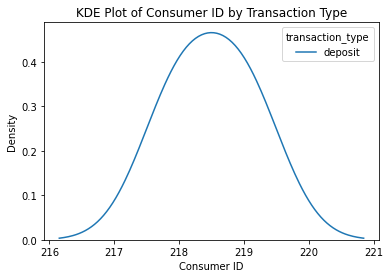

In [21]:
sns.kdeplot(data=largest_amount, x='consumer_id', hue='transaction_type', common_norm=False)
plt.title("KDE Plot of Consumer ID by Transaction Type")
plt.xlabel("Consumer ID")
plt.ylabel("Density")
plt.show()


Task 3: 
Calculate the total amount deposited for each user in the "Europe" region.

In [100]:
query ="""SELECT ut.consumer_id AS user, SUM(ut.transaction_amount) AS total_amount_deposited
FROM user_transaction_cleaned ut
JOIN user_nodes_cleaned ur ON ut.consumer_id = ur.consumer_id
JOIN world_regions wr ON wr.region_code = ur.region_id
WHERE wr.region_name = 'Europe'
GROUP BY ut.consumer_id
ORDER BY total_amount_deposited desc;
"""

In [101]:
europe_deposit= pd.read_sql_query(query, conn)

In [102]:
europe_deposit

,user,total_amount_deposited
0,197,87563.0
1,281,86184.0
2,76,77889.0
3,275,77049.0
4,110,76447.0
...,...,...
100,62,8393.0
101,263,8190.0
102,99,8127.0
103,162,8092.0


In [119]:
# plt.bar(europe_deposit['user'], europe_deposit['total_amount_deposited'])
# plt.xlabel('User')
# plt.ylabel('Total Amount Deposited')
# plt.title('Total Amount Deposited by User')
# plt.show()

In [108]:
highset_deposit = europe_deposit.head(5)

In [109]:
highset_deposit

,user,total_amount_deposited
0,197,87563.0
1,281,86184.0
2,76,77889.0
3,275,77049.0
4,110,76447.0


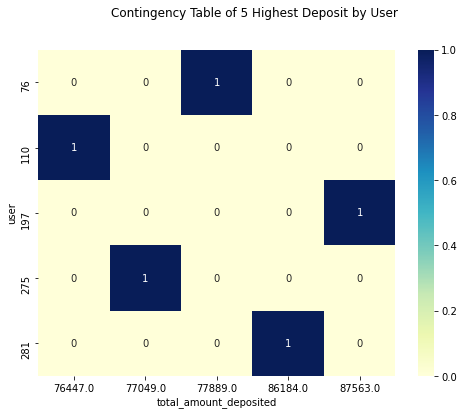

In [110]:
contingency_table = pd.crosstab(highset_deposit["user"], highset_deposit["total_amount_deposited"])
fig = plt.figure(figsize=(8, 6))
fig.suptitle('Contingency Table of 5 Highest Deposit by User')
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu")
fig.savefig('user_transactions_heatmap.jpg', dpi=300)
plt.show()

In [111]:
lowest_deposit = europe_deposit.tail(5)

In [112]:
lowest_deposit

,user,total_amount_deposited
100,62,8393.0
101,263,8190.0
102,99,8127.0
103,162,8092.0
104,133,6482.0


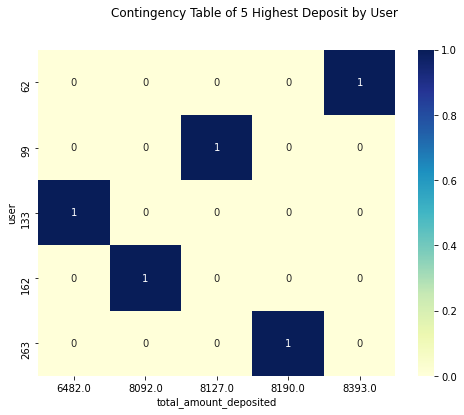

In [113]:
contingency_table = pd.crosstab(lowest_deposit["user"], lowest_deposit["total_amount_deposited"])
fig = plt.figure(figsize=(8, 6))
fig.suptitle('Contingency Table of 5 Highest Deposit by User')
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu")
fig.savefig('user_transactions_heatmap.jpg', dpi=300)
plt.show()

TASK 4:
Calculate the total number of transactions made by each user in the "United States" region.

In [89]:
query = """SELECT ut.consumer_id AS user, COUNT(ut.consumer_id) AS total_transactions
FROM user_transaction_cleaned ut
JOIN user_nodes_cleaned ur ON ut.consumer_id = ur.consumer_id
JOIN world_regions wr ON wr.region_code = ur.region_id
WHERE wr.region_name = 'United States'
GROUP BY ut.consumer_id
ORDER BY total_transactions DESC;
"""

In [90]:
usa_transaction = pd.read_sql_query(query,conn)

In [91]:
usa_transaction

,user,total_transactions
0,69,154
1,284,154
2,37,154
3,161,147
4,462,147
...,...,...
105,114,21
106,79,21
107,84,14
108,15,14


In [93]:
highset_transaction = usa_transaction.head(10)

In [94]:
highset_transaction

,user,total_transactions
0,69,154
1,284,154
2,37,154
3,161,147
4,462,147
5,422,147
6,102,147
7,344,147
8,442,147
9,283,140


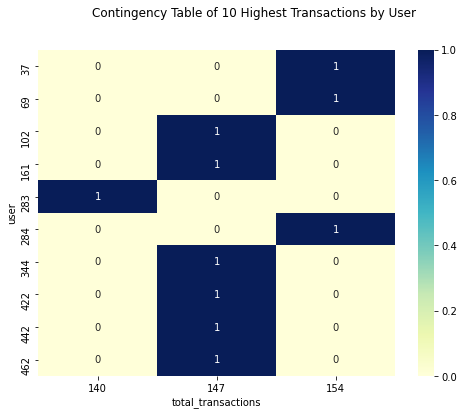

In [96]:
contingency_table = pd.crosstab(highset_transaction["user"], highset_transaction["total_transactions"])
fig = plt.figure(figsize=(8, 6))
fig.suptitle('Contingency Table of 10 Highest Transactions by User')
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu")
fig.savefig('user_transactions_heatmap.jpg', dpi=300)
plt.show()


In [116]:
lowest_transaction = usa_transaction.tail(10)

In [117]:
lowest_transaction 

,user,total_transactions
100,204,28
101,12,28
102,137,28
103,71,28
104,455,21
105,114,21
106,79,21
107,84,14
108,15,14
109,73,14


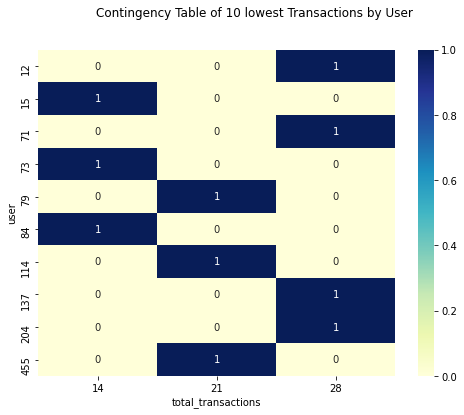

In [118]:
contingency_table = pd.crosstab(lowest_transaction["user"], lowest_transaction["total_transactions"])
fig = plt.figure(figsize=(8, 6))
fig.suptitle('Contingency Table of 10 lowest Transactions by User')
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu")
fig.savefig('user_transactions_heatmap.jpg', dpi=300)
plt.show()


Task 5: 
Calculate the total number of users who made more than 5 transactions.

In [ ]:
quey = """SELECT 
"""

In [25]:
# # Import necessary libraries
# import pandas as pd
# from datetime import datetime, timedelta
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix

# # Load data from your three tables (you should adapt this part according to your data source)
# user_nodes_data = pd.read_csv('user_nodes.csv')
# user_transaction_data = pd.read_csv('user_transaction.csv')
# world_regions_data = pd.read_csv('world_regions.csv')

# # Define churn based on a time-based threshold (e.g., 3 months of inactivity)
# end_date = datetime.strptime('3/1/20', '%d/%m/%y')
# cutoff_date = end_date - timedelta(days=90)

# # Merge data from user_nodes and user_transaction based on common columns
# merged_data = user_nodes_data.merge(user_transaction_data, on='consumer_id', how='left')

# # Create a target variable for churn based on the time threshold
# merged_data['churn'] = (merged_data['transaction_date'] < cutoff_date).astype(int)

# # Feature engineering: You can add more features based on your data

# # Split data into training and testing sets
# X = merged_data.drop(columns=['churn'])
# y = merged_data['churn']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize and train a predictive model (e.g., Random Forest)
# model = RandomForestClassifier()
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)

# # Print evaluation metrics
# print(f'Accuracy: {accuracy}')
# print(f'Confusion Matrix:\n{conf_matrix}')
